# Iris Data Analysis Using Machine Learning

In [1]:
#Start by importing some packages we will be using for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Makes graph display in notebook
%matplotlib inline   

#ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn()

#### Import the data

In [2]:
iris_data = pd.read_csv('iris.csv')

#### Explore the data

In [3]:
iris_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
iris_data.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
11,4.8,3.4,1.6,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
148,6.2,3.4,5.4,2.3,virginica


In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## DATA VISUALIZATION
### CORRELATION MATRIX AMONG FEATURES

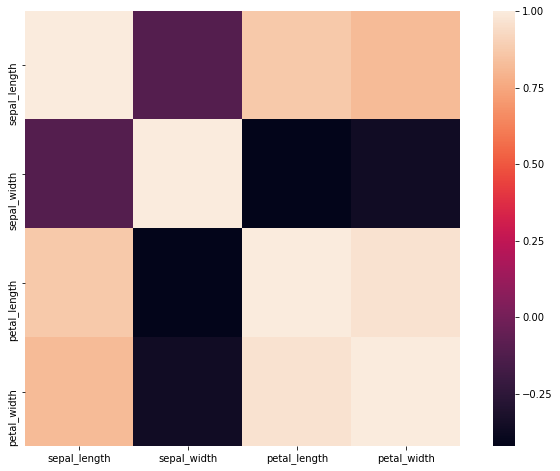

In [7]:
corrmat = iris_data.corr()
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, square=True)
  

## FEATURE ENGINEERING

### Fill in Missing Values

In [8]:
iris_data.shape

(150, 5)

In [9]:
#Print null columns
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There is no missing value. Our data is good to be trained.

In [10]:
#Shuffle the rows to mix the data up for learning
iris_datashfl = iris_data.reindex(np.random.permutation(iris_data.index))
iris_datashfl.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
96,5.7,2.9,4.2,1.3,versicolor
28,5.2,3.4,1.4,0.2,setosa


### SPLIT OUR DATA INTO TRAIN AND TEST SETS

In [11]:
y_target = iris_datashfl["species"]
iris_datashfl.drop(["species"], axis=1, inplace=True)
iris_datashfl.head(3)

,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4
96,5.7,2.9,4.2,1.3
28,5.2,3.4,1.4,0.2


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_datashfl, y_target, test_size = 0.3, random_state = 42)

print("Training data is", X_train.shape)
print("Training target is", y_train.shape)
print("test data is", X_test.shape)
print("test target is", y_test.shape)

Training data is (105, 4)
Training target is (105,)
test data is (45, 4)
test target is (45,)


### PERFORM FEATURE NORMALIZATION/ SCALING

In [13]:
from sklearn.preprocessing import RobustScaler, StandardScaler #Import scaler
scaler = RobustScaler() #create an object from RobustScaler

scaler.fit(X_train) #Fit to the train data only!

#Perform the transformation on train and test data
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

X_train[:5, :5] #Preview the first five rows and columns of train data

array([[ 0.        , -0.4       ,  0.22857143,  0.73333333],
       [-0.07692308,  1.6       , -0.74285714, -0.66666667],
       [ 0.30769231, -0.2       ,  0.        ,  0.        ],
       [ 1.23076923, -0.4       ,  0.51428571,  0.4       ],
       [ 0.53846154,  0.        ,  0.42857143,  0.6       ]])

In [14]:
#Define Cross_validation
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score


def cross_validate(model, nfolds, feats, targets):
    score = -1 * (cross_val_score(model, feats, targets, cv=nfolds))
    return np.mean(score)

### MODELLING
#### Modeling with SVM

In [15]:
#Cross validating the svm model
from sklearn import svm

clf = svm.SVC(gamma='scale') #The svm model
print("neg_error score of model: ", cross_validate(clf, 10, X_train, y_train))

neg_error score of model:  -0.9171717171717173


In [16]:
from sklearn.metrics import accuracy_score

#training the algorithm
clf.fit(X_train, y_train) 

#predict the test data
y_pred = clf.predict(X_test)

#checking the accuracy
print("accuracy_score on test data: ", accuracy_score(y_test, y_pred))

accuracy_score on test data:  0.9555555555555556


### THANKS FOR READING